In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
fname_macro = "data/macro.csv"
fname_train = "data/train.csv"
fname_test = "data/test.csv"

In [3]:
df_macro = pd.read_csv(fname_macro)
df_train = pd.read_csv(fname_train)
df_test = pd.read_csv(fname_test)

In [4]:
df_train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [5]:
df_test.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


In [6]:
df_macro.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


In [7]:
# Converting timestamps to datetime format
df_macro['timestamp'] = pd.to_datetime(df_macro['timestamp'], format="%Y-%m-%d")
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'], format="%Y-%m-%d")
df_test['timestamp'] = pd.to_datetime(df_test['timestamp'], format="%Y-%m-%d")

First - some macro variables are just going to be plain useless. Let's figure out what we have.

In [8]:
df_macro.columns

Index(['timestamp', 'oil_urals', 'gdp_quart', 'gdp_quart_growth', 'cpi', 'ppi',
       'gdp_deflator', 'balance_trade', 'balance_trade_growth', 'usdrub',
       'eurrub', 'brent', 'net_capital_export', 'gdp_annual',
       'gdp_annual_growth', 'average_provision_of_build_contract',
       'average_provision_of_build_contract_moscow', 'rts', 'micex',
       'micex_rgbi_tr', 'micex_cbi_tr', 'deposits_value', 'deposits_growth',
       'deposits_rate', 'mortgage_value', 'mortgage_growth', 'mortgage_rate',
       'grp', 'grp_growth', 'income_per_cap',
       'real_dispos_income_per_cap_growth', 'salary', 'salary_growth',
       'fixed_basket', 'retail_trade_turnover',
       'retail_trade_turnover_per_cap', 'retail_trade_turnover_growth',
       'labor_force', 'unemployment', 'employment',
       'invest_fixed_capital_per_cap', 'invest_fixed_assets',
       'profitable_enterpr_share', 'unprofitable_enterpr_share',
       'share_own_revenues', 'overdue_wages_per_cap', 'fin_res_per_cap',
    

### Removed Variables from Common Sense Inspection
'ppi', 'gdp_deflator', 'balance_trade', 'balance_trade_growth', 
'net_capital_export', 'average_provision_of_build_contract',
       'average_provision_of_build_contract_moscow',
       'retail_trade_turnover',
       'retail_trade_turnover_per_cap', 'retail_trade_turnover_growth',
'invest_fixed_capital_per_cap', 'invest_fixed_assets',
       'profitable_enterpr_share', 'unprofitable_enterpr_share',
       'share_own_revenues', 'overdue_wages_per_cap', 'fin_res_per_cap',
       'marriages_per_1000_cap', 'divorce_rate', 'construction_value',
       'invest_fixed_assets_phys', 'pop_natural_increase', 'pop_migration',
       'pop_total_inc', 'childbirth', 'mortality',
'housing_fund_sqm',
       'lodging_sqm_per_cap', 'water_pipes_share', 'baths_share',
       'sewerage_share', 'gas_share', 'hot_water_share',
       'electric_stove_share', 'heating_share', 'old_house_share',
       'average_life_exp', 'infant_mortarity_per_1000_cap',
       'perinatal_mort_per_1000_cap', 'incidence_population',
 'load_of_teachers_preschool_per_teacher',
       'child_on_acc_pre_school', 'load_of_teachers_school_per_teacher',
       'students_state_oneshift', 'modern_education_share',
       'old_education_build_share', 'provision_doctors', 'provision_nurse',
       'load_on_doctors', 'power_clinics', 'hospital_beds_available_per_cap',
       'hospital_bed_occupancy_per_year', 'provision_retail_space_sqm',
       'provision_retail_space_modern_sqm', 'turnover_catering_per_cap',
       'theaters_viewers_per_1000_cap', 'seats_theather_rfmin_per_100000_cap',
       'museum_visitis_per_100_cap', 'bandwidth_sports',
       'population_reg_sports_share', 'students_reg_sports_share',
'apartment_build', 'apartment_fund_sqm'

In [9]:
df_macro = df_macro[['timestamp', 'oil_urals', 'gdp_quart', 'gdp_quart_growth', 'cpi', 'usdrub', 'eurrub', 'brent', 
       'gdp_annual', 'gdp_annual_growth', 'rts', 'micex', 'micex_rgbi_tr', 'micex_cbi_tr', 'deposits_value', 'deposits_growth',
       'deposits_rate', 'mortgage_value', 'mortgage_growth', 'mortgage_rate', 'grp', 'grp_growth', 'income_per_cap',
       'real_dispos_income_per_cap_growth', 'salary', 'salary_growth', 'fixed_basket', 'labor_force', 'unemployment', 
       'employment', 'rent_price_4+room_bus', 'rent_price_3room_bus', 'rent_price_2room_bus', 'rent_price_1room_bus', 
       'rent_price_3room_eco', 'rent_price_2room_eco', 'rent_price_1room_eco']]

Finding the date range of the training and testing data sets

In [10]:
df_train.timestamp.min(), df_train.timestamp.max(), df_test.timestamp.min(), df_test.timestamp.max()

(Timestamp('2011-08-20 00:00:00'),
 Timestamp('2015-06-30 00:00:00'),
 Timestamp('2015-07-01 00:00:00'),
 Timestamp('2016-05-30 00:00:00'))

Further filtering the macro dataset for those dates that a year before the first training timestamp to the last test timestamp. Reasoning being - we don't need anything past the last sale. Any kind of user-created macro variables would be at longest a year-over-year change, so we only need data a year before the first sale.

In [11]:
df_macro = df_macro[(df_macro.timestamp >= pd.Timestamp("2010-08-20 00:00:00")) & 
                    (df_macro.timestamp <= pd.Timestamp("2016-05-30 00:00:00"))]

In [12]:
# How many rows do we have left
len(df_macro)

2111

Let's see how many missing values we have now. I don't want to impute macro data, so first I want to remove columns that have a large number of missing values.

In [13]:
df_macro.isnull().sum()

timestamp                              0
oil_urals                              0
gdp_quart                              0
gdp_quart_growth                       0
cpi                                    0
usdrub                                 0
eurrub                                 0
brent                                  0
gdp_annual                             0
gdp_annual_growth                      0
rts                                    0
micex                                  0
micex_rgbi_tr                          0
micex_cbi_tr                           0
deposits_value                         0
deposits_growth                        0
deposits_rate                        134
mortgage_value                         0
mortgage_growth                      134
mortgage_rate                          0
grp                                  516
grp_growth                           650
income_per_cap                       151
real_dispos_income_per_cap_growth    516
salary          

Easy wins - taking out grp, grp_growth, and real_dispos_income_per_cap_growth - missing values for over 25% of the data

In [14]:
df_macro = df_macro[['timestamp', 'oil_urals', 'gdp_quart', 'gdp_quart_growth', 'cpi', 'usdrub', 'eurrub', 'brent', 
       'gdp_annual', 'gdp_annual_growth', 'rts', 'micex', 'micex_rgbi_tr', 'micex_cbi_tr', 'deposits_value', 'deposits_growth',
       'deposits_rate', 'mortgage_value', 'mortgage_growth', 'mortgage_rate', 'income_per_cap', 'salary', 'salary_growth', 
       'fixed_basket', 'labor_force', 'unemployment', 'employment', 'rent_price_4+room_bus', 'rent_price_3room_bus', 
       'rent_price_2room_bus', 'rent_price_1room_bus', 'rent_price_3room_eco', 'rent_price_2room_eco', 'rent_price_1room_eco']]
df_macro.isnull().sum()

timestamp                  0
oil_urals                  0
gdp_quart                  0
gdp_quart_growth           0
cpi                        0
usdrub                     0
eurrub                     0
brent                      0
gdp_annual                 0
gdp_annual_growth          0
rts                        0
micex                      0
micex_rgbi_tr              0
micex_cbi_tr               0
deposits_value             0
deposits_growth            0
deposits_rate            134
mortgage_value             0
mortgage_growth          134
mortgage_rate              0
income_per_cap           151
salary                   151
salary_growth            285
fixed_basket               0
labor_force              151
unemployment             151
employment               151
rent_price_4+room_bus     42
rent_price_3room_bus      42
rent_price_2room_bus      42
rent_price_1room_bus      42
rent_price_3room_eco      42
rent_price_2room_eco      42
rent_price_1room_eco      42
dtype: int64

Looks like the rent prices are missing values systemically - let's see what dates we're missing.

In [15]:
df_macro.timestamp[df_macro.rent_price_1room_bus.isnull()]

231   2010-08-20
232   2010-08-21
233   2010-08-22
234   2010-08-23
235   2010-08-24
236   2010-08-25
237   2010-08-26
238   2010-08-27
239   2010-08-28
240   2010-08-29
241   2010-08-30
242   2010-08-31
243   2010-09-01
244   2010-09-02
245   2010-09-03
246   2010-09-04
247   2010-09-05
248   2010-09-06
249   2010-09-07
250   2010-09-08
251   2010-09-09
252   2010-09-10
253   2010-09-11
254   2010-09-12
255   2010-09-13
256   2010-09-14
257   2010-09-15
258   2010-09-16
259   2010-09-17
260   2010-09-18
261   2010-09-19
262   2010-09-20
263   2010-09-21
264   2010-09-22
265   2010-09-23
266   2010-09-24
267   2010-09-25
268   2010-09-26
269   2010-09-27
270   2010-09-28
271   2010-09-29
272   2010-09-30
Name: timestamp, dtype: datetime64[ns]

August/September of 2010 are missing. It wouldn't be unreasonable to backfill the price on 10-01-2010 to fill in these missing values - rent prices shouldn't be expected to change that greatly in two months.

What are the differences between each rent price category?

In [16]:
df_macro[['timestamp', 'rent_price_4+room_bus', 'rent_price_3room_bus', 'rent_price_2room_bus', 'rent_price_1room_bus', 
          'rent_price_3room_eco', 'rent_price_2room_eco', 'rent_price_1room_eco']].groupby(by=df_macro.timestamp.dt.year).agg(np.mean)

,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco
timestamp,,,,,,,
2010,167.165109,80.124457,59.590217,45.328587,40.098804,34.371087,28.350978
2011,155.211315,84.616630,61.720438,47.412767,43.971068,36.364795,29.190247
2012,150.137814,89.522158,67.467732,52.258115,46.174454,39.444153,31.742732
2013,150.116740,88.825479,70.946904,53.941945,47.758603,38.382164,30.700466
2014,173.302822,102.771041,80.741096,61.652466,50.454247,42.212356,33.862521
2015,189.917479,111.129753,80.733151,52.080247,50.303726,40.048822,31.331425
2016,181.609470,103.131788,75.424636,51.442119,47.627682,37.744636,29.472715


Looks like buisness class pricess are slightly more volatile that economy. Let's keep the 1 bedroom prices for each for now.

In [17]:
df_macro = df_macro[['timestamp', 'oil_urals', 'gdp_quart', 'gdp_quart_growth', 'cpi', 'usdrub', 'eurrub', 'brent', 
       'gdp_annual', 'gdp_annual_growth', 'rts', 'micex', 'micex_rgbi_tr', 'micex_cbi_tr', 'deposits_value', 'deposits_growth',
       'deposits_rate', 'mortgage_value', 'mortgage_growth', 'mortgage_rate', 'income_per_cap', 'salary', 'salary_growth', 
       'fixed_basket', 'labor_force', 'unemployment', 'employment', 'rent_price_1room_bus', 'rent_price_1room_eco']]
df_macro.isnull().sum()

timestamp                 0
oil_urals                 0
gdp_quart                 0
gdp_quart_growth          0
cpi                       0
usdrub                    0
eurrub                    0
brent                     0
gdp_annual                0
gdp_annual_growth         0
rts                       0
micex                     0
micex_rgbi_tr             0
micex_cbi_tr              0
deposits_value            0
deposits_growth           0
deposits_rate           134
mortgage_value            0
mortgage_growth         134
mortgage_rate             0
income_per_cap          151
salary                  151
salary_growth           285
fixed_basket              0
labor_force             151
unemployment            151
employment              151
rent_price_1room_bus     42
rent_price_1room_eco     42
dtype: int64

I think we only need one variable for deposits/mortage. According to the data dictionary, mortgage_rate is an average mortgage rate, deposits growth is rate of growth on deposits. I want to keep these two variables - if people are saving more and mortages rates are lower, people may purchase more expensive houses and vice versa. These should be the most telling.

In [18]:
df_macro = df_macro[['timestamp', 'oil_urals', 'gdp_quart', 'gdp_quart_growth', 'cpi', 'usdrub', 'eurrub', 'brent', 
       'gdp_annual', 'gdp_annual_growth', 'rts', 'micex', 'micex_rgbi_tr', 'micex_cbi_tr', 'deposits_growth',
       'mortgage_rate', 'income_per_cap', 'salary', 'salary_growth', 'fixed_basket', 'labor_force', 'unemployment', 
       'employment', 'rent_price_1room_bus', 'rent_price_1room_eco']]
df_macro.isnull().sum()

timestamp                 0
oil_urals                 0
gdp_quart                 0
gdp_quart_growth          0
cpi                       0
usdrub                    0
eurrub                    0
brent                     0
gdp_annual                0
gdp_annual_growth         0
rts                       0
micex                     0
micex_rgbi_tr             0
micex_cbi_tr              0
deposits_growth           0
mortgage_rate             0
income_per_cap          151
salary                  151
salary_growth           285
fixed_basket              0
labor_force             151
unemployment            151
employment              151
rent_price_1room_bus     42
rent_price_1room_eco     42
dtype: int64

Taking a look at the salary/income variables.

In [19]:
df_macro[['timestamp','income_per_cap','salary','salary_growth']].groupby(by=df_macro.timestamp.dt.year).agg(np.mean)

,income_per_cap,salary,salary_growth
timestamp,,,
2010,48679.591791,38410.5,NaN
2011,47118.762192,44898.7,0.168917
2012,49218.445355,48830.4,0.087568
2013,55196.900000,55485.2,0.136284
2014,54783.260274,61208.0,0.103141
2015,59910.101370,64310.0,0.050680
2016,NaN,NaN,NaN


Let's keep salary for the simple reason of if someone isn't working, they probably aren't buying a house - so per capita should be less useful.

In [20]:
df_macro = df_macro[['timestamp', 'oil_urals', 'gdp_quart', 'gdp_quart_growth', 'cpi', 'usdrub', 'eurrub', 'brent', 
       'gdp_annual', 'gdp_annual_growth', 'rts', 'micex', 'micex_rgbi_tr', 'micex_cbi_tr', 'deposits_growth',
       'mortgage_rate', 'salary', 'fixed_basket', 'labor_force', 'unemployment', 'employment', 'rent_price_1room_bus', 
       'rent_price_1room_eco']]
df_macro.isnull().sum()

timestamp                 0
oil_urals                 0
gdp_quart                 0
gdp_quart_growth          0
cpi                       0
usdrub                    0
eurrub                    0
brent                     0
gdp_annual                0
gdp_annual_growth         0
rts                       0
micex                     0
micex_rgbi_tr             0
micex_cbi_tr              0
deposits_growth           0
mortgage_rate             0
salary                  151
fixed_basket              0
labor_force             151
unemployment            151
employment              151
rent_price_1room_bus     42
rent_price_1room_eco     42
dtype: int64

Taking a look at the employment figures.

In [21]:
df_macro[['timestamp', 'labor_force', 'unemployment', 'employment']].groupby(by=df_macro.timestamp.dt.year).agg(np.mean)

,labor_force,unemployment,employment
timestamp,,,
2010,6436.244000,0.018000,0.690000
2011,6643.626000,0.014000,0.708000
2012,6799.974000,0.008000,0.716000
2013,6879.314000,0.017000,0.718000
2014,7087.326000,0.015000,0.740000
2015,7067.470079,0.017708,0.733598
2016,NaN,NaN,NaN


Russia doesn't have a 1.7 unmployment rate at any point in the past 10 years, so I'm not sure what that variable is measuring. Labor_force absolute numbers are meaningless without context. Employment rate seems to be in line with outside sources, so let's keep that.

In [22]:
df_macro = df_macro[['timestamp', 'oil_urals', 'gdp_quart', 'gdp_quart_growth', 'cpi', 'usdrub', 'eurrub', 'brent', 
       'gdp_annual', 'gdp_annual_growth', 'rts', 'micex', 'micex_rgbi_tr', 'micex_cbi_tr', 'deposits_growth',
       'mortgage_rate', 'salary', 'fixed_basket', 'employment', 'rent_price_1room_bus', 'rent_price_1room_eco']]
df_macro.isnull().sum()

timestamp                 0
oil_urals                 0
gdp_quart                 0
gdp_quart_growth          0
cpi                       0
usdrub                    0
eurrub                    0
brent                     0
gdp_annual                0
gdp_annual_growth         0
rts                       0
micex                     0
micex_rgbi_tr             0
micex_cbi_tr              0
deposits_growth           0
mortgage_rate             0
salary                  151
fixed_basket              0
employment              151
rent_price_1room_bus     42
rent_price_1room_eco     42
dtype: int64

Finally, let's take a look at the GDP numbers.

In [23]:
df_macro[['timestamp','gdp_quart','gdp_quart_growth','gdp_annual','gdp_annual_growth']].groupby(by=df_macro.timestamp.dt.year).agg(np.mean)

,gdp_quart,gdp_quart_growth,gdp_annual,gdp_annual_growth
timestamp,,,,
2010,11738.746269,4.176119,38807.2,-0.078209
2011,14025.150411,4.172329,46308.5,0.045037
2012,16350.619672,4.296448,59698.1,0.042644
2013,17464.380548,1.297808,66926.9,0.035179
2014,19001.213425,1.070685,71016.7,0.012795
2015,20072.952603,-2.666301,77945.1,0.007065
2016,20643.331788,-2.766887,80804.3,-0.037267


Not sure what these are measuring exactly. gdp_annual_growth looks to be the GDP growth for the past year based on outside sources so let's keep that variable

In [25]:
df_macro = df_macro[['timestamp', 'oil_urals', 'cpi', 'usdrub', 'eurrub', 'brent', 'gdp_annual_growth', 'rts', 'micex', 
                     'micex_rgbi_tr', 'micex_cbi_tr', 'deposits_growth', 'mortgage_rate', 'salary', 'fixed_basket', 
                     'employment', 'rent_price_1room_bus', 'rent_price_1room_eco']]
df_macro.isnull().sum()

timestamp                 0
oil_urals                 0
cpi                       0
usdrub                    0
eurrub                    0
brent                     0
gdp_annual_growth         0
rts                       0
micex                     0
micex_rgbi_tr             0
micex_cbi_tr              0
deposits_growth           0
mortgage_rate             0
salary                  151
fixed_basket              0
employment              151
rent_price_1room_bus     42
rent_price_1room_eco     42
dtype: int64

I'm happy with the above dataset. I believe a lot could be filtered out from common sense. The remaining variables can be further investigated by analyzing the data.

But first, let's take care of those missing values.

In [26]:
df_macro.timestamp[df_macro.salary.isnull()]

2191   2016-01-01
2192   2016-01-02
2193   2016-01-03
2194   2016-01-04
2195   2016-01-05
2196   2016-01-06
2197   2016-01-07
2198   2016-01-08
2199   2016-01-09
2200   2016-01-10
2201   2016-01-11
2202   2016-01-12
2203   2016-01-13
2204   2016-01-14
2205   2016-01-15
2206   2016-01-16
2207   2016-01-17
2208   2016-01-18
2209   2016-01-19
2210   2016-01-20
2211   2016-01-21
2212   2016-01-22
2213   2016-01-23
2214   2016-01-24
2215   2016-01-25
2216   2016-01-26
2217   2016-01-27
2218   2016-01-28
2219   2016-01-29
2220   2016-01-30
          ...    
2312   2016-05-01
2313   2016-05-02
2314   2016-05-03
2315   2016-05-04
2316   2016-05-05
2317   2016-05-06
2318   2016-05-07
2319   2016-05-08
2320   2016-05-09
2321   2016-05-10
2322   2016-05-11
2323   2016-05-12
2324   2016-05-13
2325   2016-05-14
2326   2016-05-15
2327   2016-05-16
2328   2016-05-17
2329   2016-05-18
2330   2016-05-19
2331   2016-05-20
2332   2016-05-21
2333   2016-05-22
2334   2016-05-23
2335   2016-05-24
2336   201

All 2016 values are missing - so let's fill in with the last value from 2015.

In [27]:
df_macro.salary.fillna(value=df_macro.salary.loc[2190], inplace=True)

Taking a look at missing employment values:

In [28]:
df_macro.timestamp[df_macro.employment.isnull()]

2191   2016-01-01
2192   2016-01-02
2193   2016-01-03
2194   2016-01-04
2195   2016-01-05
2196   2016-01-06
2197   2016-01-07
2198   2016-01-08
2199   2016-01-09
2200   2016-01-10
2201   2016-01-11
2202   2016-01-12
2203   2016-01-13
2204   2016-01-14
2205   2016-01-15
2206   2016-01-16
2207   2016-01-17
2208   2016-01-18
2209   2016-01-19
2210   2016-01-20
2211   2016-01-21
2212   2016-01-22
2213   2016-01-23
2214   2016-01-24
2215   2016-01-25
2216   2016-01-26
2217   2016-01-27
2218   2016-01-28
2219   2016-01-29
2220   2016-01-30
          ...    
2312   2016-05-01
2313   2016-05-02
2314   2016-05-03
2315   2016-05-04
2316   2016-05-05
2317   2016-05-06
2318   2016-05-07
2319   2016-05-08
2320   2016-05-09
2321   2016-05-10
2322   2016-05-11
2323   2016-05-12
2324   2016-05-13
2325   2016-05-14
2326   2016-05-15
2327   2016-05-16
2328   2016-05-17
2329   2016-05-18
2330   2016-05-19
2331   2016-05-20
2332   2016-05-21
2333   2016-05-22
2334   2016-05-23
2335   2016-05-24
2336   201

Same thing as salary, so let's fill in with last value from 2015

In [29]:
df_macro.employment.fillna(value=df_macro.employment.loc[2190], inplace=True)

Earlier, we saw the missing apartment values were at the very beginning of the data set - the first two months were missing - so let's just backfill with the first available value.

In [30]:
df_macro.rent_price_1room_bus.fillna(value=df_macro.rent_price_1room_bus.loc[273], inplace=True)
df_macro.rent_price_1room_eco.fillna(value=df_macro.rent_price_1room_eco.loc[273], inplace=True)

In [31]:
df_macro.isnull().sum()

timestamp               0
oil_urals               0
cpi                     0
usdrub                  0
eurrub                  0
brent                   0
gdp_annual_growth       0
rts                     0
micex                   0
micex_rgbi_tr           0
micex_cbi_tr            0
deposits_growth         0
mortgage_rate           0
salary                  0
fixed_basket            0
employment              0
rent_price_1room_bus    0
rent_price_1room_eco    0
dtype: int64

Let's take a look at how these variables are correlated against each other.

In [35]:
df_corr = df_macro.drop('timestamp', axis=1).corr()

/home/ubuntu/.virtualenvs/data-science/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


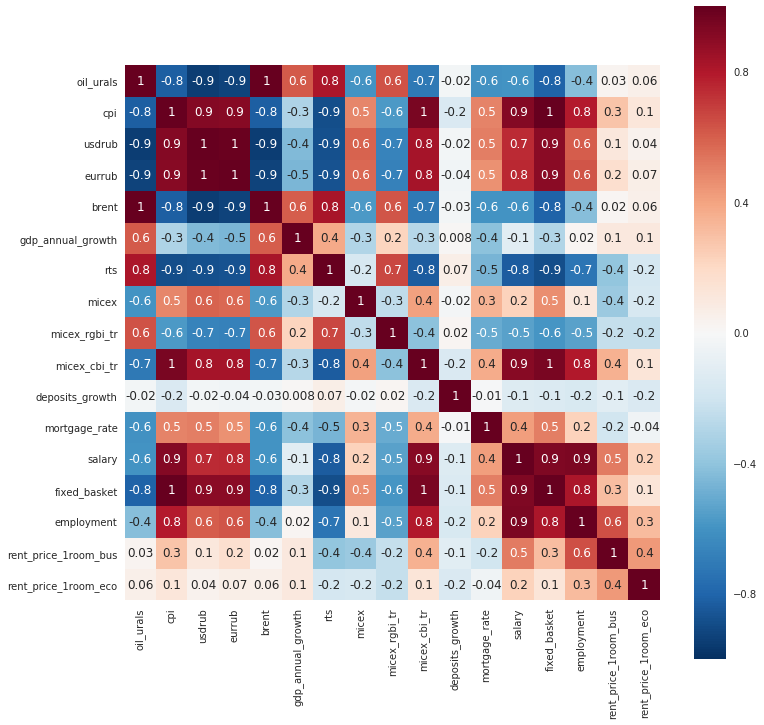

In [42]:
plt.figure(figsize=(12,12))
sns.heatmap(df_corr, annot=True, fmt='.1g', square=True)

CPI is perfectly correlated with fixed_basket - let's remove fixed basket.
USDRUB and EURRUB are perfectly correlated as well - let's remove USDRUB.
MICEX_CBI_TR is perfectly correlated with CPI - lets removed MICEX_CBI_TR.
BRENT and OIL_URALS are perfectly correlated as well - let's remove BRENT.

/home/ubuntu/.virtualenvs/data-science/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


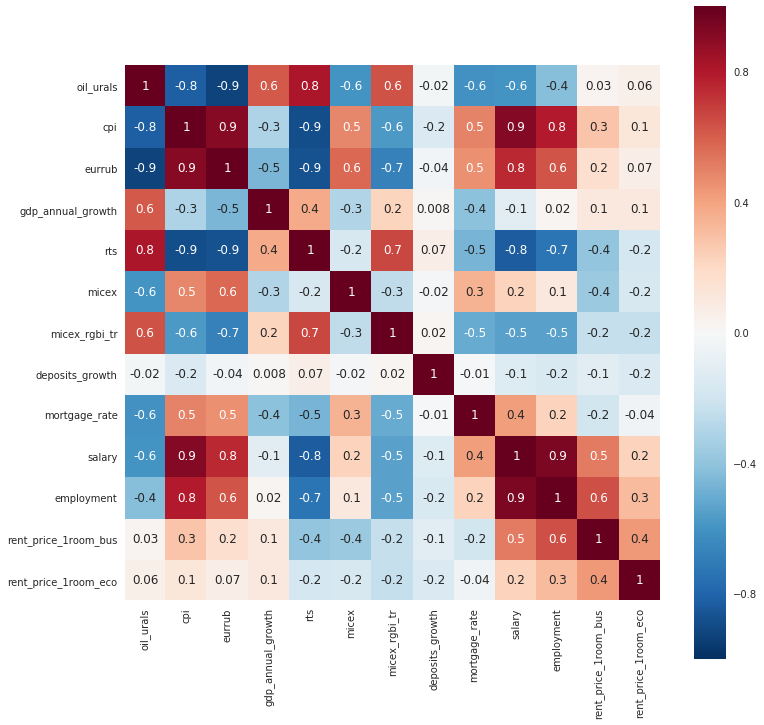

In [43]:
df_macro = df_macro[['timestamp', 'oil_urals', 'cpi', 'eurrub', 'gdp_annual_growth', 'rts', 'micex', 
                     'micex_rgbi_tr', 'deposits_growth', 'mortgage_rate', 'salary', 
                     'employment', 'rent_price_1room_bus', 'rent_price_1room_eco']]
df_corr = df_macro.drop('timestamp', axis=1).corr()
plt.figure(figsize=(12,12))
sns.heatmap(df_corr, annot=True, fmt='.1g', square=True)

EURRUB/CPI are have > .9 correlation. Let's remove EURRUB
SALARY and EMPLOYMENT have > .9 correlation. Let's remove SALARY since it is also highly correlated with CPI.

/home/ubuntu/.virtualenvs/data-science/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


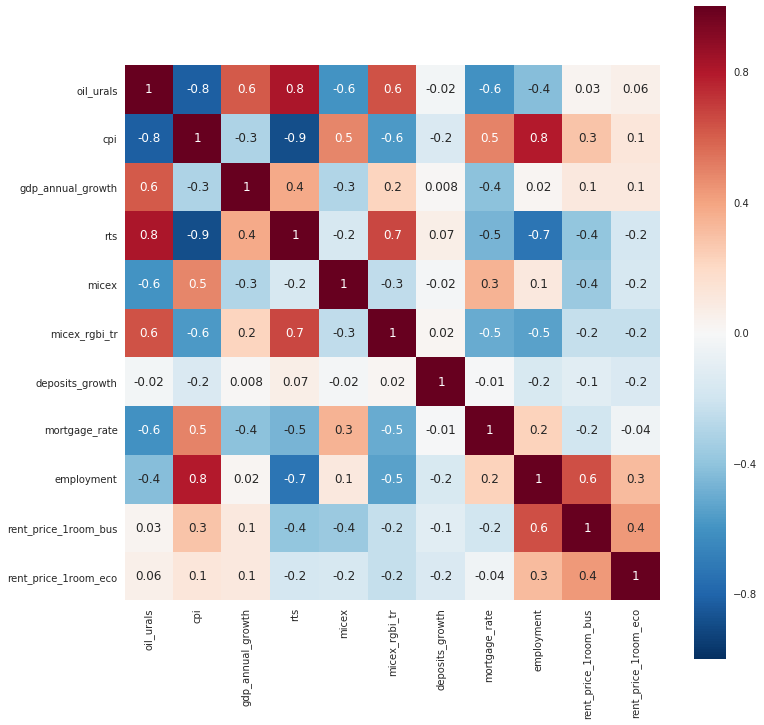

In [44]:
df_macro = df_macro[['timestamp', 'oil_urals', 'cpi', 'gdp_annual_growth', 'rts', 'micex', 
                     'micex_rgbi_tr', 'deposits_growth', 'mortgage_rate', 
                     'employment', 'rent_price_1room_bus', 'rent_price_1room_eco']]
df_corr = df_macro.drop('timestamp', axis=1).corr()
plt.figure(figsize=(12,12))
sns.heatmap(df_corr, annot=True, fmt='.1g', square=True)

In [75]:
df_price = df_train[['id', 'timestamp', 'price_doc']]

In [76]:
df_price.head()

,id,timestamp,price_doc
0,1,2011-08-20,5850000
1,2,2011-08-23,6000000
2,3,2011-08-27,5700000
3,4,2011-09-01,13100000
4,5,2011-09-05,16331452


In [77]:
df_price = df_price.merge(df_macro, on='timestamp')

In [78]:
df_price.head()

,id,timestamp,price_doc,oil_urals,cpi,usdrub,eurrub,brent,gdp_annual_growth,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_growth,mortgage_rate,salary,fixed_basket,employment,rent_price_1room_bus,rent_price_1room_eco
0,1,2011-08-20,5850000,109.31,354.0,29.0048,41.7681,108.62,0.045037,1575.33,1438.74,131.16,204.78,0.009740,11.84,44898.7,12838.36,0.708,47.85,29.07
1,2,2011-08-23,6000000,109.31,354.0,28.9525,41.7537,109.31,0.045037,1578.91,1444.11,131.45,204.92,0.009740,11.84,44898.7,12838.36,0.708,47.85,29.07
2,3,2011-08-27,5700000,109.31,354.0,28.8082,41.7114,111.36,0.045037,1596.17,1458.84,131.08,204.84,0.009740,11.84,44898.7,12838.36,0.708,47.85,29.07
3,4,2011-09-01,13100000,111.29,353.2,28.9655,41.4014,114.29,0.045037,1703.86,1551.58,131.45,205.42,0.009607,11.92,44898.7,12856.97,0.708,51.15,30.63
4,5,2011-09-05,16331452,111.29,353.2,29.4625,41.5902,110.08,0.045037,1617.01,1492.83,131.19,198.24,0.018590,11.92,44898.7,12856.97,0.708,51.15,30.63


In [49]:
y = np.log(df_train['price_doc'])

In [79]:
import xgboost as xgb